In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

In [3]:
from pc_deform import deform_point_cloud_dislocation
from pymccrgb.ioutils import read_las, write_las
from pymccrgb.plotting import plot_points_3d

In [4]:
import matplotlib.pyplot as plt
from plotting import initialize_plot_settings
initialize_plot_settings()

## HSL Data

In [5]:
pre_data = read_las('data/HSLSurvey101319_utm_thin100.laz')
post_data = read_las('data/HSLSurvey101419_utm_thin100.laz')

In [6]:
print(f'Pre-event dataset: {pre_data.shape[0]} points')
print(f'Post-event dataset: {post_data.shape[0]} points')

Pre-event dataset: 2196272 points
Post-event dataset: 2030740 points


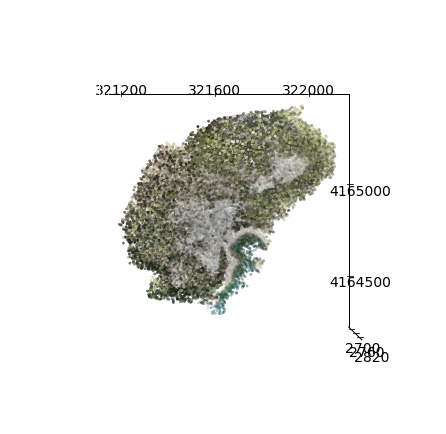

In [7]:
plot_points_3d(pre_data[::100, :])
plt.gca().view_init(elev=90, azim=270)

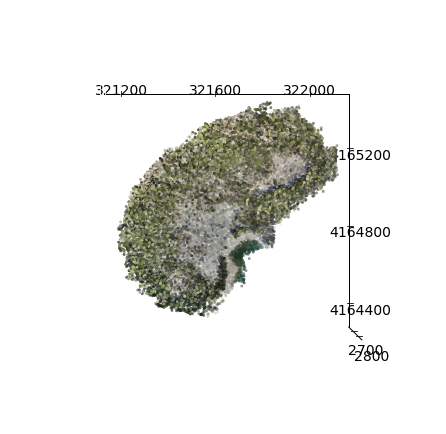

In [8]:
plot_points_3d(post_data[::100, :])
plt.gca().view_init(elev=90, azim=270)

## Synthetic examples

Synthetic examples use a vertical, N-S striking fault with dip slip.

The dislocation model configurations are:

| Parameter | Values |
|-----------|--------|
| Strike (deg)    | 0 (N-S) |
| Dip (deg)       | 90 |
| Depth (m)       | 0, 1, 5, 10 |
| Dip slip (m)    | 0.5, 1, 2 |
| Strike slip (m) | 0 |

Two sets of synthetic examples are produced:

- Same day. The point cloud from 10/13 is deformed.
- Following day. The point cloud from 10/14 is deformed.

These examples use unfiltered point clouds.

In [20]:
origin_x = np.mean(pre_data[:, 0])
origin_y = np.mean(pre_data[:, 1])

In [21]:
print(f'Dislocation origin is {origin_x:.0f} m E, {origin_y:.0f} m N')

Dislocation origin is 321640 m E, 4164932 m N


### 10/13 survey

In [22]:
dip, strike, slip_ss = (90, 0, 0)
depths = [0, 1, 5, 10]
dip_slips = [0.5, 1, 2]
for depth in depths:
    for slip_ds in dip_slips:
        pre_filename = 'data/HSLSurvey101319_utm_thin100.las'
        post_filename = f'output/hsl_101319_s{strike:.0f}_d{dip:.0f}_dep{depth:.0f}_ss{slip_ss:.0f}_ds{slip_ds:.0f}.las'
        deform_point_cloud_dislocation(pre_filename,
                                       post_filename,
                                       dip=dip,
                                       strike=strike,
                                       depth=depth,
                                       slip_ss=slip_ss,
                                       slip_ds=slip_ds,
                                       origin_x=origin_x,
                                       origin_y=origin_y)

In [23]:
pre_data = read_las(pre_filename)
post_data = read_las(post_filename)

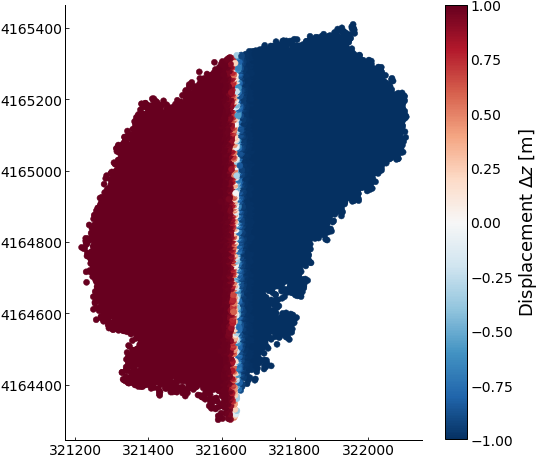

In [24]:
x = post_data[::100, 0]
y = post_data[::100, 1]
dz = pre_data[::100, 2] - post_data[::100, 2]
c = plt.scatter(x, y, c=dz, cmap='RdBu_r')
plt.colorbar(c, label='Displacement $\Delta z$ [m]')

### 10/14 survey

In [25]:
dip, strike, slip_ss = (90, 0, 0)
depths = [0, 1, 5, 10]
dip_slips = [0.5, 1, 2]
for depth in depths:
    for slip_ds in dip_slips:
        pre_filename = 'data/HSLSurvey101419_utm_thin100.las'
        post_filename = f'output/hsl_101419_s{strike:.0f}_d{dip:.0f}_dep{depth:.0f}_ss{slip_ss:.0f}_ds{slip_ds:.0f}.las'
        deform_point_cloud_dislocation(pre_filename,
                                       post_filename,
                                       dip=dip,
                                       strike=strike,
                                       depth=depth,
                                       slip_ss=slip_ss,
                                       slip_ds=slip_ds,
                                       origin_x=origin_x,
                                       origin_y=origin_y)

In [26]:
pre_data = read_las(pre_filename)
post_data = read_las(post_filename)

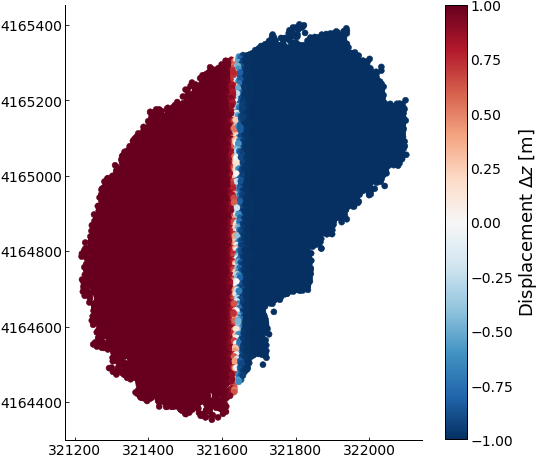

In [27]:
x = post_data[::100, 0]
y = post_data[::100, 1]
dz = pre_data[::100, 2] - post_data[::100, 2]
c = plt.scatter(x, y, c=dz, cmap='RdBu_r')
plt.colorbar(c, label='Displacement $\Delta z$ [m]')